In [ ]:
목적 : 이커머스 데이터 분석 
사용 데이터 : Kaggle에 오픈된 브라질 온라인 쇼핑몰 "Olist"의 데이터셋
학습목표 : 이커머스 데이터를 이해하기 위해, 데이터셋을 원하는 형태로 바꾸고, 그에 적합한 시각화 진행
**추가 ** 
in[161] error 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# 라이브러리 import

import pandas as pd
import numpy as np

# 시각화 라이브러리 import

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify #treemap

In [4]:
#한글폰트 사용
path = 'C:/Users/hongm/Downloads/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothicLight.ttf'  
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [5]:
plt.rcParams['axes.unicode_minus'] = False #matplotlib에서 마이너스 부호가 깨질때 사용
plt.rcParams['font.family'] = 'NanumBarunGothicLight'
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (12,8)

In [6]:
dir ='C:/Users/hongm/Downloads/Brazilian E-commerce Public Dataset by Olist'

In [7]:
df_order = pd.read_csv('C:/Users/hongm/Downloads/Brazilian E-commerce Public Dataset by Olist/olist_orders_dataset.csv')
df_order_item = pd.read_csv(dir + '/olist_order_items_dataset.csv')
# df_order_pay = pd.read_csv(dir + 'brazilian-ecommerce/olist_order_payments_dataset.csv')
# df_order_review = pd.read_csv(dir + 'brazilian-ecommerce/olist_order_reviews_dataset.csv')
# df_cust = pd.read_csv(dir + 'brazilian-ecommerce/olist_customers_dataset.csv')
# df_geo = pd.read_csv(dir + 'brazilian-ecommerce/olist_geolocation_dataset.csv')
# df_product = pd.read_csv(dir + 'brazilian-ecommerce/olist_products_dataset.csv')
# df_seller = pd.read_csv(dir + 'brazilian-ecommerce/olist_sellers_dataset.csv')
# df_category = pd.read_csv(dir + 'brazilian-ecommerce/product_category_name_translation.csv')

In [8]:
#object 타입의 칼럼을 시간 데이터 타입으로 변경(하나씩)
# df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'])
# df_order.info()

#or 처음 데이터 로드할때부터 바꿔주는 방법 

df_order = pd.read_csv(dir + '/olist_orders_dataset.csv',
                      parse_dates=['order_purchase_timestamp',
                                    'order_approved_at',
                                    'order_delivered_carrier_date',
                                    'order_delivered_customer_date',
                                    'order_estimated_delivery_date'
                                   ])

df_order.sample(5)
print(df_order.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


In [9]:
#이외의 데이터셋들 읽기
df_order_item = pd.read_csv(dir + '/olist_order_items_dataset.csv',
                           parse_dates=['shipping_limit_date'])

df_order_review = pd.read_csv(dir + '/olist_order_reviews_dataset.csv',
                             parse_dates=['review_creation_date','review_answer_timestamp'])

df_order_pay = pd.read_csv(dir + '/olist_order_payments_dataset.csv')
df_cust = pd.read_csv(dir + '/olist_customers_dataset.csv')
df_product = pd.read_csv(dir + '/olist_products_dataset.csv')
df_seller = pd.read_csv(dir + '/olist_sellers_dataset.csv')
df_category = pd.read_csv(dir + '/product_category_name_translation.csv')
df_geo = pd.read_csv(dir + '/olist_geolocation_dataset.csv')

In [10]:
print("df_cust shape: {}".format(df_cust.shape))
print("df_geo shape: {}".format(df_geo.shape))
print("df_order_item shape: {}".format(df_order_item.shape))
print("df_order_pay shape: {}".format(df_order_pay.shape))
print("df_order_review shape: {}".format(df_order_review.shape))
print("df_order shape: {}".format(df_order.shape))
print("df_product shape: {}".format(df_product.shape))
print("df_seller: {}".format(df_seller.shape))
print("df_category: {}".format(df_category.shape))

df_cust shape: (99441, 5)
df_geo shape: (1000163, 5)
df_order_item shape: (112650, 7)
df_order_pay shape: (103886, 5)
df_order_review shape: (100000, 7)
df_order shape: (99441, 8)
df_product shape: (32951, 9)
df_seller: (3095, 4)
df_category: (71, 2)


In [11]:
# 첫번째로 Olist_orders_dataset 테이블을 EDA 해보기 
df_order.shape

(99441, 8)

In [12]:
df_order.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [13]:
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [14]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [15]:
df_order.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,27c60cfbe4965270943d7cdab0989038,3e427aba8dacfeb381377ca002f96282,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [16]:
#object 타입을 제외한 나머지값을 볼때 설정
df_order.describe(exclude = [np.object])

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
unique,98875,90733,81018,95664,459
top,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,3,9,47,3,522
first,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [17]:
# 결측치 수 확인
df_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
#결측치가 있는 데이터들의 row 출력
df_order_null = df_order[df_order.isnull().any(axis=1
                                              )]
df_order_null

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [19]:
#order_approeved_at 칼럼에 있는 null 값의 row 출력
df_order_col1 = df_order[df_order['order_approved_at'].isnull()]
df_order_col1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


findfont: Font family ['NanumBarunGothicLight'] not found. Falling back to DejaVu Sans.


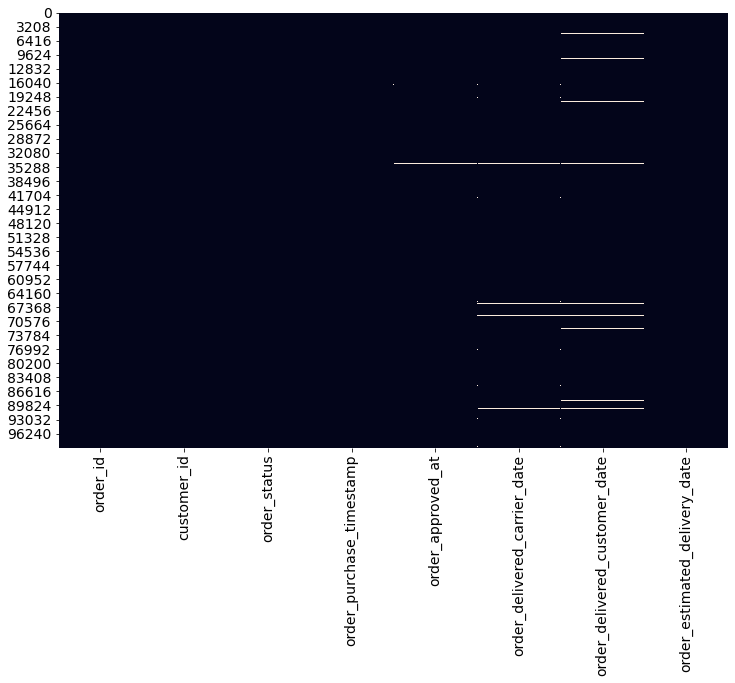

In [20]:
#결측지 시각화 (seaborn / missingno 라이브러리)
sns.heatmap(df_order.isnull(), cbar=False)

findfont: Font family ['NanumBarunGothicLight'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothicLight'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothicLight'] not found. Falling back to DejaVu Sans.


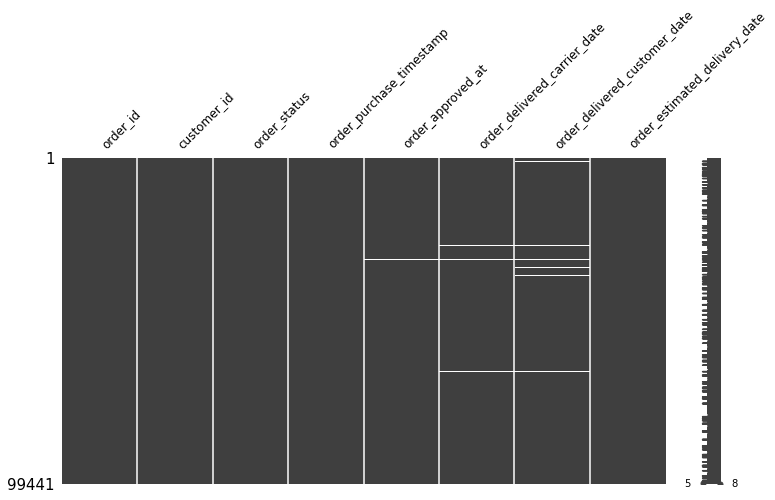

In [21]:
msno.matrix(df_order, fontsize=12, figsize=(12,6))

findfont: Font family ['NanumBarunGothicLight'] not found. Falling back to DejaVu Sans.


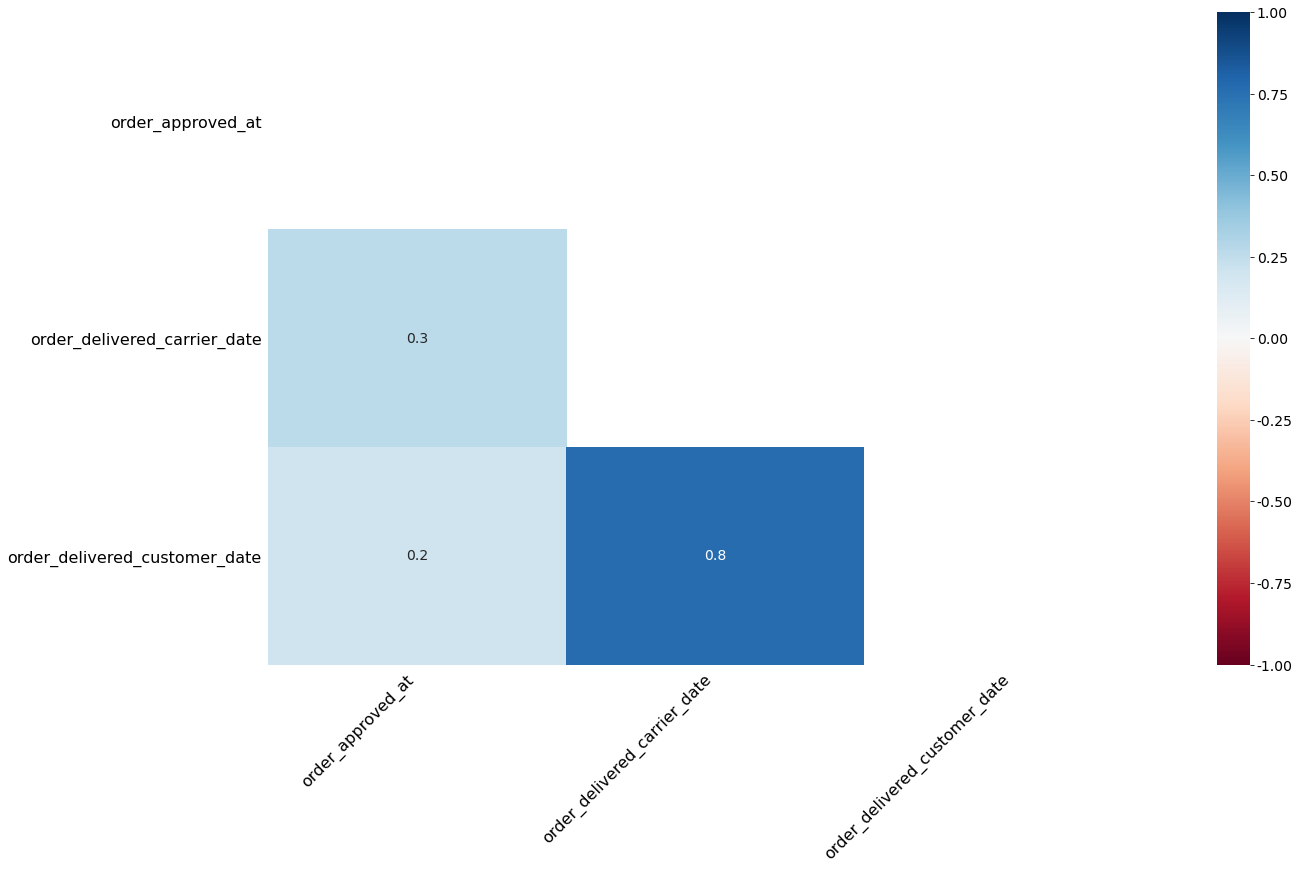

In [22]:
msno.heatmap(df_order)

In [23]:
#결측치 삭제 
df_order_clean = df_order.dropna(axis=0)
#인덱싱 재지정
df_order_clean.reset_index(drop=True, inplace = True)
df_order_clean

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
96456,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
96457,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
96458,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
96459,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [24]:
#주문 상태의 고유값
df_order_clean['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [25]:
df_order_clean['order_status'].value_counts()

#배달이 완료된 주문상태와 이후 취소된 상태를 확인할 수 있다. 

delivered    96455
canceled         6
Name: order_status, dtype: int64

In [26]:
#null 값이 있는 DF의 주문 상태 고유값 
df_order_null['order_status'].unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [27]:
#null값이 있는 df의 주문 상태 별 수 
df_order_null['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

In [28]:
#중간 결과 
"위의 정보들을 볼때, 고객에게 배송이 완료된 경우에 취소가 6건 정도지만, 
"고객에게 결제/배송 진행 도중에 취소된 건수는 619건임을 생각해볼수 있다." 


SyntaxError: EOL while scanning string literal (<ipython-input-28-a2e202034330>, line 2)

In [29]:
#취소된 건에 대한 차트 비교를 위해 알맞은 데이터 형태로 바꾸기.

A = df_order_clean[df_order_clean['order_status']=='canceled'].shape[0]
B = df_order_null[df_order_null['order_status']=='canceled'].shape[0]

temp = pd.DataFrame(columns=['del_finished' , 'del_not_finished'],
                   index = ['cancel_cnt'])
temp.loc['cancel_cnt','del_finished'] = A
temp.loc['cancel_cnt','del_not_finished'] =B
temp

,del_finished,del_not_finished
cancel_cnt,6,619


In [30]:
temp.T


,cancel_cnt
del_finished,6
del_not_finished,619


<Figure size 864x432 with 0 Axes>

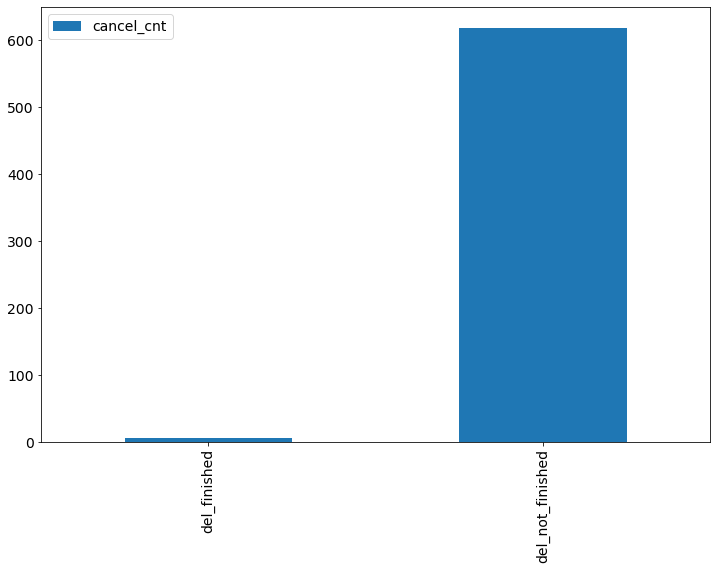

In [31]:
#취소된 건에 대한 차트 비교 : 세로 막대그래프
plt.figure(figsize=(12,6))
temp.T.plot(kind='bar')
plt.show()

<Figure size 864x432 with 0 Axes>

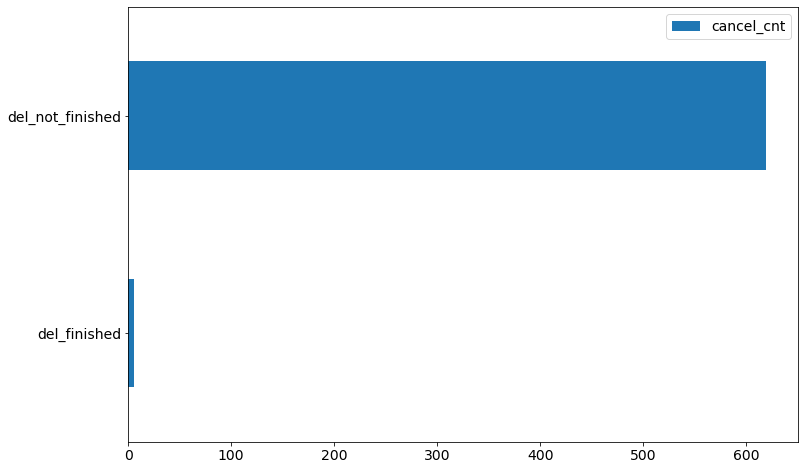

In [32]:
#가로막대 그래프
plt.figure(figsize=(12,6))
temp.T.plot(kind='barh')
plt.show()

In [33]:
#요약
df_order_clean.describe(exclude=[np.object])

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461
unique,95939,88272,80100,95649,445
top,2018-07-28 13:11:22,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-12-02 00:26:45,2017-12-20 00:00:00
freq,3,9,47,3,507
first,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [34]:
 olist_orders_dataset 테이블에 새로운 정보 추가

order_purchase_timestamp : 구매 시작 날짜/시간

order_approved_at : 결제 완료 날짜/시간

order_delivered_customer_date : 실제 고객한테 배달완료된 날짜/시간

order_estimated_delivery_date : 시스템에서 고객한테 표시되는 예상배달날짜

order_approved_at - order_purchase_timestamp : pay_lead_time(단위: 분)

order_delivered_customer_date - order_approved_at : delivery_lead_time(단위: 일)

order_estimated_delivery_date - order_delivered_customer_date : estimated_date_miss(단위: 일)

SyntaxError: invalid syntax (<ipython-input-34-236c45d6dc82>, line 1)

In [35]:
#결제리드타임
df_order_clean['pay_lead_time']=df_order_clean['order_approved_at']-df_order_clean['order_purchase_timestamp']
df_order_clean['pay_lead_time']

0       0 days 00:10:42
1       1 days 06:42:50
2       0 days 00:16:34
3       0 days 00:17:53
4       0 days 01:01:50
              ...      
96456   0 days 00:00:00
96457   0 days 00:11:39
96458   0 days 00:17:33
96459   0 days 00:07:54
96460   0 days 14:22:58
Name: pay_lead_time, Length: 96461, dtype: timedelta64[ns]

In [36]:
#분 단위로 변경
df_order_clean['pay_lead_time_m']=df_order_clean['pay_lead_time'].astype('timedelta64[m]')
df_order_clean['pay_lead_time_m']

0          10.0
1        1842.0
2          16.0
3          17.0
4          61.0
          ...  
96456       0.0
96457      11.0
96458      17.0
96459       7.0
96460     862.0
Name: pay_lead_time_m, Length: 96461, dtype: float64

In [37]:
#배달리드타임
#일 단위
df_order_clean['delivery_lead_time']= df_order_clean['order_delivered_customer_date']- df_order_clean['order_approved_at']
df_order_clean['delivery_lead_time_D'] = df_order_clean['delivery_lead_time'].astype('timedelta64[D]')
df_order_clean['delivery_lead_time_D']

0         8.0
1        12.0
2         9.0
3        13.0
4         2.0
         ... 
96456     8.0
96457    22.0
96458    24.0
96459    17.0
96460     7.0
Name: delivery_lead_time_D, Length: 96461, dtype: float64

In [38]:
#예상날짜 miss
df_order_clean['estimated_date_miss'] = df_order_clean['order_estimated_delivery_date']-df_order_clean['order_delivered_customer_date']
df_order_clean['estimated_date_miss_D']=df_order_clean['estimated_date_miss'].astype('timedelta64[D]')
df_order_clean['estimated_date_miss_D']

0         7.0
1         5.0
2        17.0
3        12.0
4         9.0
         ... 
96456    10.0
96457     1.0
96458     5.0
96459    20.0
96460    17.0
Name: estimated_date_miss_D, Length: 96461, dtype: float64

In [39]:
#세칼럼을 모두 정수로 바꿈
df_order_clean['pay_lead_time_m']=  df_order_clean['pay_lead_time_m'].astype(int)
df_order_clean['delivery_lead_time_D'] = df_order_clean['delivery_lead_time_D'].astype(int)
df_order_clean['estimated_date_miss_D'] = df_order_clean['estimated_date_miss_D'].astype(int)

In [40]:
df_order_clean.dtypes

order_id                                  object
customer_id                               object
order_status                              object
order_purchase_timestamp          datetime64[ns]
order_approved_at                 datetime64[ns]
order_delivered_carrier_date      datetime64[ns]
order_delivered_customer_date     datetime64[ns]
order_estimated_delivery_date     datetime64[ns]
pay_lead_time                    timedelta64[ns]
pay_lead_time_m                            int32
delivery_lead_time               timedelta64[ns]
delivery_lead_time_D                       int32
estimated_date_miss              timedelta64[ns]
estimated_date_miss_D                      int32
dtype: object

In [41]:
df_order_clean.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,pay_lead_time,pay_lead_time_m,delivery_lead_time,delivery_lead_time_D,estimated_date_miss,estimated_date_miss_D
64404,34c18a8b5a4a469bd30549f852d97e32,1314355cd90fe9019e54bd1521df0ab6,delivered,2018-08-09 18:52:55,2018-08-09 19:05:15,2018-08-10 13:40:00,2018-08-15 22:52:43,2018-09-05,0 days 00:12:20,12,6 days 03:47:28,6,20 days 01:07:17,20
70670,75a9fc924db699a13c8d6176c3b16a61,a4f28ed68b2f9af8945705a5b6a6703f,delivered,2018-06-13 12:48:42,2018-06-14 13:00:07,2018-06-15 07:47:00,2018-06-21 18:23:42,2018-07-05,1 days 00:11:25,1451,7 days 05:23:35,7,13 days 05:36:18,13
60415,afc652a59f20b96fbf7c8e5bb1a6c1f1,3a76019da6d27bd392b555346c436507,delivered,2018-02-26 09:17:53,2018-02-26 10:00:23,2018-02-27 14:48:52,2018-04-18 11:02:51,2018-03-22,0 days 00:42:30,42,51 days 01:02:28,51,-28 days +12:57:09,-28


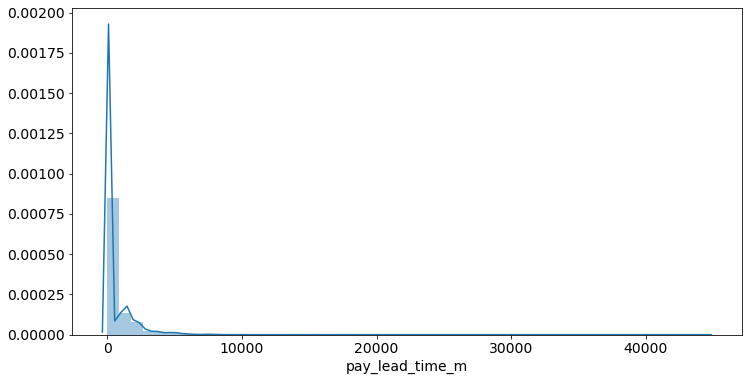

In [42]:
#pay_lead_time(분)

plt.figure(figsize =(12,6))
sns.distplot(df_order_clean['pay_lead_time_m'])

#'오른쪽에 치우친 형태'

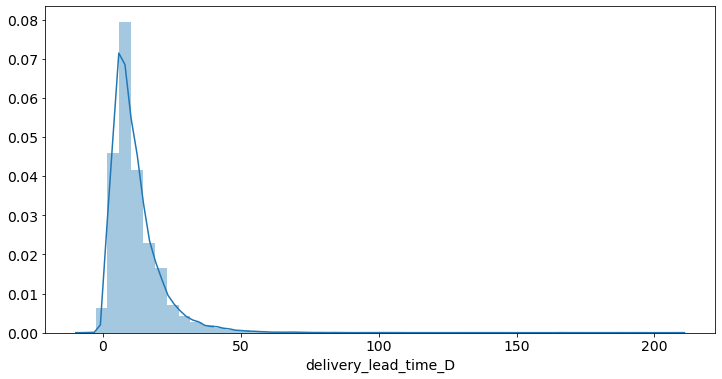

In [43]:
plt.figure(figsize=(12,6))
sns.distplot(df_order_clean['delivery_lead_time_D'])

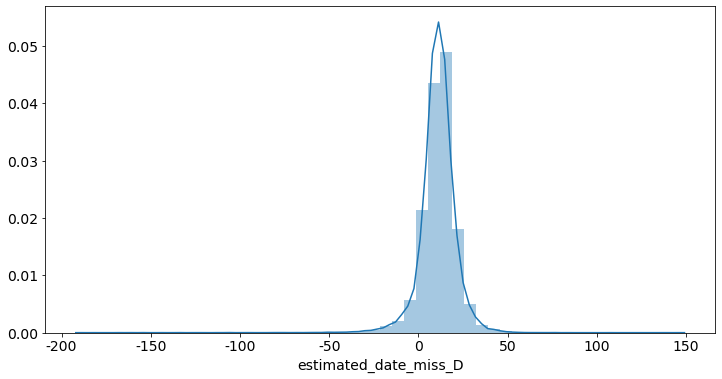

In [44]:
# estimated_date_miss

plt.figure(figsize=(12,6))
sns.distplot(df_order_clean['estimated_date_miss_D'])

#"양의 값들과 음의 값들이 모두 포진된 그래프 형태"

In [45]:
df_order_clean[['pay_lead_time_m','delivery_lead_time_D','estimated_date_miss_D']].describe()

,pay_lead_time_m,delivery_lead_time_D,estimated_date_miss_D
count,96461.000000,96461.00000,96461.000000
mean,616.178777,11.64255,10.875577
std,1232.131340,9.51991,10.183476
min,0.000000,-7.00000,-189.000000
25%,12.000000,6.00000,6.000000
50%,20.000000,9.00000,11.000000
75%,871.000000,15.00000,16.000000
max,44486.000000,208.00000,146.000000


In [46]:
#데이터 불균형을 알기위해 boxplot 사용

df_order_time=df_order_clean[['pay_lead_time_m','delivery_lead_time_D','estimated_date_miss_D']]
df_order_time


,pay_lead_time_m,delivery_lead_time_D,estimated_date_miss_D
0,10,8,7
1,1842,12,5
2,16,9,17
3,17,13,12
4,61,2,9
...,...,...,...
96456,0,8,10
96457,11,22,1
96458,17,24,5
96459,7,17,20


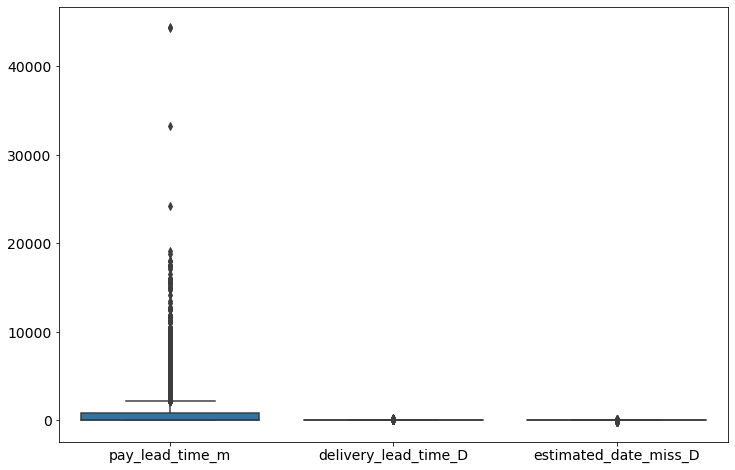

In [47]:
# df_order_time.boxplot(column=['pay_lead_time','delivery_lead_time','estimated_date_miss'], figsize=(12,8))

plt.figure(figsize =(12,8))
sns.boxplot(data=df_order_time)
 
plt.show()

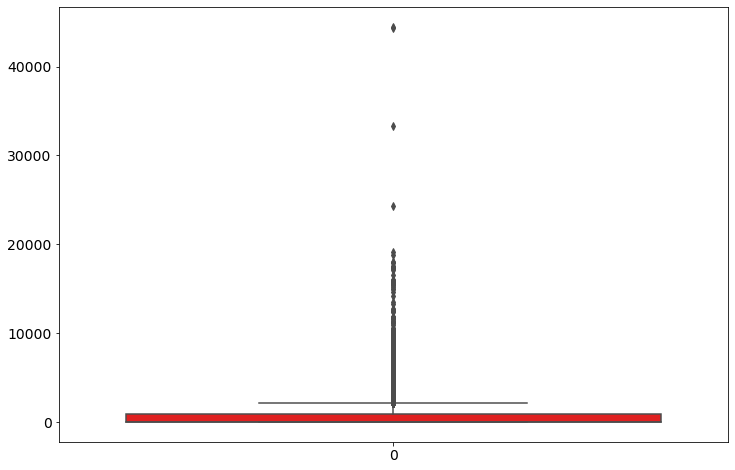

In [48]:
# temp.boxplot(column=['pay_lead_time_m'],figsize=(12,8))

plt.figure(figsize=(12,8))
sns.boxplot(data=df_order_time['pay_lead_time_m'], color='red')
plt.show()

In [49]:
#outlier 검출 코드

import numpy as np

def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound)|(data < lower_bound))

In [50]:
# 이상치 수 구하기

print(outliers_iqr(df_order_time['pay_lead_time_m'])[0].shape[0]) #shape를 넣으면 수를 알 수 있다. 
print(outliers_iqr(df_order_time['delivery_lead_time_D'])[0].shape[0])
print(outliers_iqr(df_order_time['estimated_date_miss_D'])[0].shape[0])


8915
4772
4300


In [51]:
pay_lead_outlier_index = outliers_iqr(df_order_time['pay_lead_time_m'])[0]
del_lead_outlier_index = outliers_iqr(df_order_time['delivery_lead_time_D'])[0]
est_lead_outlier_index = outliers_iqr(df_order_time['estimated_date_miss_D'])[0]

In [52]:
# 이상치 row들의 인덱스는 넘파이 배열로 출력
print(type(pay_lead_outlier_index), pay_lead_outlier_index)


<class 'numpy.ndarray'> [   11    14    29 ... 96412 96413 96427]


In [53]:
# pay_lead_time 이상치에 해당되는 값 출력 loc[인덱스, 값]

df_order_time.loc[pay_lead_outlier_index,'pay_lead_time_m']

11       2466
14       7467
29       2326
31       2878
37       5232
         ... 
96398    5877
96409    4975
96412    2465
96413    2483
96427    7288
Name: pay_lead_time_m, Length: 8915, dtype: int32

In [54]:
#세 칼럽에 대한 이상치 제거

# numpy concat을 통한 array 배열 합치기

lead_outlier_index = np.concatenate((pay_lead_outlier_index,
                                    del_lead_outlier_index,
                                    est_lead_outlier_index)
                                   , axis =None)
print(len(lead_outlier_index))
lead_outlier_index

17987


array([   11,    14,    29, ..., 96437, 96443, 96454], dtype=int64)

In [55]:
#for문을 이용해 이상치가 아닌 리드타임 값의 인덱스를 추려준다. 

lead_not_outlier_index=[]

for i in df_order_time.index:
        if i not in lead_outlier_index:
            lead_not_outlier_index.append(i)
            
print(lead_not_outlier_index[:20])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21, 22]


In [56]:
#이상치(oulier)가 아닌 값들을 출력

df_order_time_clean = df_order_time.loc[lead_not_outlier_index ]
df_order_time_clean = df_order_time_clean.reset_index(drop=True)
df_order_time_clean

,pay_lead_time_m,delivery_lead_time_D,estimated_date_miss_D
0,10,8,7
1,1842,12,5
2,16,9,17
3,17,13,12
4,61,2,9
...,...,...,...
81500,0,8,10
81501,11,22,1
81502,17,24,5
81503,7,17,20


In [57]:
# 클렌징한 DF의 요약정보
df_order_time_clean.describe()

#이상치 값을 삭제한후의 데이터들이 더욱 일목요연함을 알수 있다. 특히 배달리드 시간의 최솟값에 음수값이 없어졌다. 

,pay_lead_time_m,delivery_lead_time_D,estimated_date_miss_D
count,81505.000000,81505.000000,81505.000000
mean,309.597154,10.164113,11.645641
std,567.404995,6.056576,6.966586
min,0.000000,0.000000,-9.000000
25%,12.000000,6.000000,7.000000
50%,18.000000,9.000000,12.000000
75%,152.000000,14.000000,16.000000
max,2159.000000,28.000000,31.000000


In [58]:
#상품을 주무한 고객들은 어떤 고객들인지 확인해보기 (table: olist_customer_dataset)
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [59]:
df_cust.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [60]:
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [61]:
# state별 고객 수
cust_stat = pd.DataFrame(df_cust['customer_state'].value_counts()).reset_index()
cust_stat.columns= ['states','people_lives']
cust_stat

,states,people_lives
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


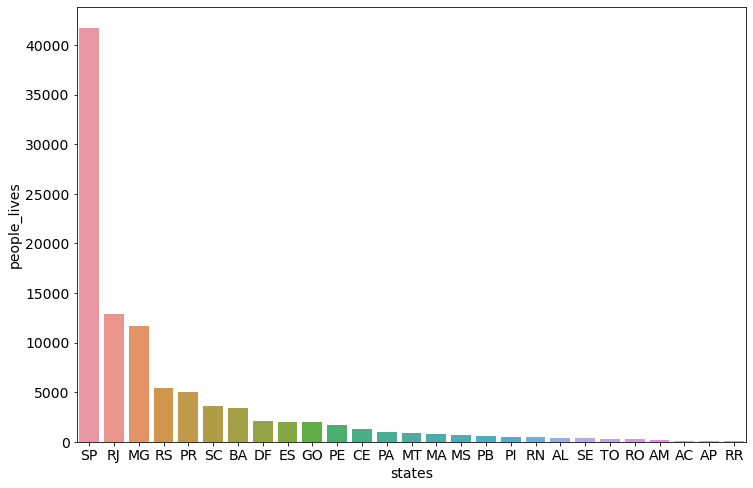

In [62]:
#state별 고객 수 시각화 :막대그래프
sns.barplot(x='states', y='people_lives', data= cust_stat)

In [63]:
#도시 별 고객 비율(퍼센트 구하기)

df_cust['customer_city'].value_counts(normalize=True)*100 

sao paulo          15.627357
rio de janeiro      6.920687
belo horizonte      2.788588
brasilia            2.142979
curitiba            1.529550
                     ...    
novo itacolomi      0.001006
botupora            0.001006
florania            0.001006
lagoa dos patos     0.001006
ulianopolis         0.001006
Name: customer_city, Length: 4119, dtype: float64

In [64]:
#도시별 고객이 살고 있는 비율
df_customer_city = pd.DataFrame(df_cust['customer_city'].value_counts(normalize=True)*100).reset_index()
df_customer_city.columns=['city','people_lives_perc']

df_customer_city.loc[:10,:]
#상파울로, 리오등 큰 도시에 살고 있는 고객 비율이 높다.

,city,people_lives_perc
0,sao paulo,15.627357
1,rio de janeiro,6.920687
2,belo horizonte,2.788588
3,brasilia,2.142979
4,curitiba,1.529550
5,campinas,1.452117
6,porto alegre,1.386752
7,salvador,1.251999
8,guarulhos,1.195684
9,sao bernardo do campo,0.943273


findfont: Font family ['NanumBarunGothicLight'] not found. Falling back to DejaVu Sans.


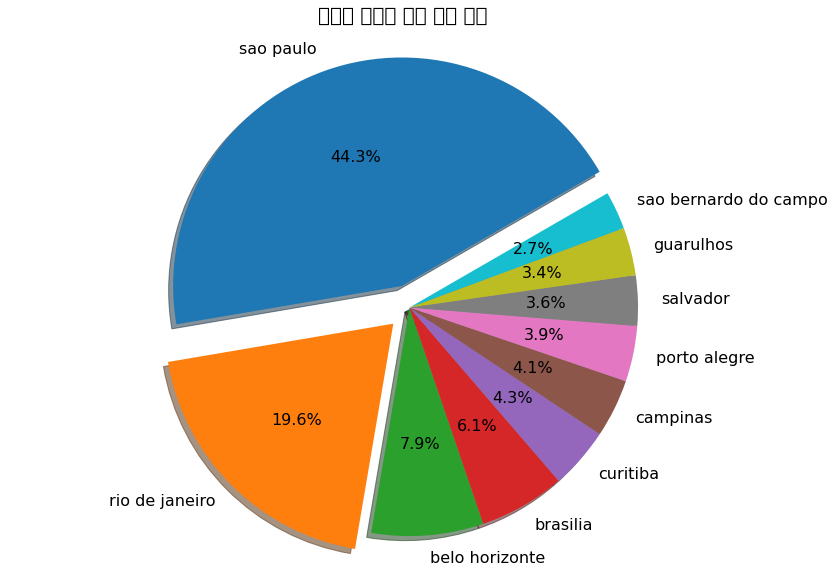

In [65]:
#chat 시각화
labels = df_customer_city['city'].values[:10]
sizes = df_customer_city['people_lives_perc'].values[:10]

explode = (0.1, 0.1, 0, 0, 0,
           0, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, 
        explode=explode, 
        autopct='%1.1f%%',
        shadow=True, startangle=30,
       textprops={'fontsize': 16})

ax1.axis('equal')  
plt.rcParams['font.family'] = 'NanumBarunGothicLight' #설정해주었지만, 한글이 깨져서 다시 설정

plt.tight_layout()
plt.title('도시별 고객이 살고 있는 비율', fontsize=20)
plt.show()


In [66]:
#고객들이 실제 주문한 상품들은 어떤 것인지 확인(olist_order_items_dataset)
df_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [67]:
df_order_item.head()

#"order_item_id"칼럼이 가진 뜻이 정확히 어떤 것인지 확인해서 정확한 데이터 분석하기

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [68]:
temp=pd.DataFrame(df_order_item.groupby(by=['order_id'])['order_item_id'].count().reset_index())
temp.columns= ['order_id','order_item 수']
temp[temp['order_item 수']== temp['order_item 수'].max()]

,order_id,order_item 수
50137,8272b63d03f5f79c56e9e4120aec44ef,21


In [69]:
df_order_item[df_order_item['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']
#order_id는 같지만 product_id가 미세하게 다름을 확인할 수 있다
즉, 'order_item_id'칼럼의 뜻은 하나의 주문(order_id)에서 구매한 상품들의 수를 뜻한다. (상품 종류와 무관하게)
그래서 하나의 주문번호에서 "상품별 매출액"을 산출하기 위해서 각 상품들의 "구매수량"칼럼을 추가해준다. (상품단가*구매수량 = 상품별 매출액)

SyntaxError: invalid syntax (<ipython-input-69-f5a1a25e9b8e>, line 3)

In [70]:
# 주문한 상품 수량 : order_prod_quantity
df_qt = pd.DataFrame(df_order_item.groupby(by=['order_id','product_id'])['order_item_id'].count().reset_index())

# 칼럼명 변경
df_qt.columns = ['order_id','product_id','order_prod_quantity']
df_qt



,order_id,product_id,order_prod_quantity
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1
...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,1
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,1
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,1
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,1


In [71]:
df_qt[df_qt['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']

,order_id,product_id,order_prod_quantity
52027,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,10
52028,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,10
52029,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,1


In [72]:
#상품 별 주문수량을 추가해주기 위한 merge
df_order_item_col = ['order_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value']

df_order_item = pd.merge(df_order_item[df_order_item_col], \
                            df_qt, how='inner', on=['order_id','product_id'])

#칼럼 순서 재배치
df_order_item = df_order_item[['order_id','product_id','price','freight_value',\
               'order_prod_quantity','shipping_limit_date','seller_id']]

df_order_item

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,1,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,1,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,1,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,1,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,1,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79


In [73]:
df_order_item[df_order_item['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']


,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id
57297,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57298,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57299,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57300,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57301,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57302,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57303,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57304,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57305,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57306,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9


In [75]:
=> row 중복이 발생.'조인할 때 데이터프레임의 shape을 그대로 가져옴'



SyntaxError: invalid syntax (<ipython-input-75-98abec8850c3>, line 1)

In [76]:
# 발생된 중복 row를 제거해줍니다.

df_order_item.drop_duplicates(inplace=True)
df_order_item.reset_index(drop=True,inplace=True)
df_order_item

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,1,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,1,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,1,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,1,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87
...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,1,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79


In [77]:
#주문 내 상품 별 매출액을 계산 (price(상품단가)* order_prod_quantity(상품의 주문수량) = order_amount(주문 당 상품의 매출금액 ))

df_order_item['order_amount'] = df_order_item['price'] * df_order_item['order_prod_quantity']
df_order_item.reset_index(drop=True, inplace=True)
df_order_item

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id,order_amount
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,1,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,1,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,1,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,1,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87,199.90
...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c,299.99
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182,350.00
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,1,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53,99.90
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99


In [78]:
#실제 주문 내역 테이블을 기준으로 상품 정보 매칭하기 (olist_order_items_dataset,  olist_products_dataset ,product_category_name_translation)
    
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [79]:
df_product.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [80]:
df_product.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [81]:
#df_category와 영어명 매칭해주기(포루투갈어로 되어있음)

df_product_cat= pd.merge(df_product, df_category, \
                        how='left' , on=['product_category_name'])
df_product_cat = df_product_cat[['product_id', 'product_category_name', 'product_category_name_english',
                   'product_name_lenght','product_description_lenght',
                   'product_photos_qty', 'product_weight_g',
                   'product_length_cm', 'product_height_cm', 'product_width_cm']]

df_product_cat

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [82]:
df_product_cat.isnull().sum()

product_id                         0
product_category_name            610
product_category_name_english    623
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
dtype: int64

In [83]:
#df_order_item을 기준으로 병합하기 상품의 이름을 알기 위해
df_order_item_prod = pd.merge(df_order_item, df_product_cat, how='left', on=['product_id'])
df_order_item_prod

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id,order_amount,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,1,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202,58.90,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,1,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36,239.90,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d,199.00,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,1,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4,12.99,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,1,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87,199.90,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c,299.99,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182,350.00,informatica_acessorios,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,1,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53,99.90,esporte_lazer,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,informatica_acessorios,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [84]:
# 요약정보 확인

df_order_item_prod.describe()

,price,freight_value,order_prod_quantity,order_amount,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,102425.000000,102425.000000,102425.000000,102425.000000,100965.000000,100965.000000,100965.000000,102409.000000,102409.000000,102409.000000,102409.000000
mean,124.422006,20.111152,1.099829,132.698498,48.874868,787.263804,2.239915,2090.916472,30.085285,16.409222,23.039528
std,188.926084,15.884700,0.456926,205.308847,9.997415,650.586810,1.743415,3750.962163,16.097482,13.310745,11.747033
min,0.850000,0.000000,1.000000,0.850000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,40.000000,13.140000,1.000000,44.900000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,78.800000,16.320000,1.000000,81.000000,52.000000,603.000000,2.000000,700.000000,25.000000,13.000000,20.000000
75%,139.000000,21.220000,1.000000,147.900000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,6735.000000,409.680000,20.000000,13440.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [85]:
df_order_item_prod.isnull().sum()

order_id                            0
product_id                          0
price                               0
freight_value                       0
order_prod_quantity                 0
shipping_limit_date                 0
seller_id                           0
order_amount                        0
product_category_name            1460
product_category_name_english    1482
product_name_lenght              1460
product_description_lenght       1460
product_photos_qty               1460
product_weight_g                   16
product_length_cm                  16
product_height_cm                  16
product_width_cm                   16
dtype: int64

In [86]:
#null값이 존재하는 row 출력하기
df_order_item_prod[df_order_item_prod.isnull().any(axis=1)]

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id,order_amount,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
113,0046e1d57f4c07c8c92ab26be8c3dfc0,ff6caf9340512b8bf6d2a2a6df032cfa,7.79,7.78,1,2017-10-02 15:49:17,38e6dada03429a47197d5d584d793b41,7.79,NaN,NaN,NaN,NaN,NaN,200.0,16.0,5.0,12.0
115,00482f2670787292280e0a8153d82467,a9c404971d1a5b1cbc2e4070e02731fd,7.60,10.96,1,2017-02-17 16:18:07,702835e4b785b67a084280efca355756,7.60,NaN,NaN,NaN,NaN,NaN,700.0,35.0,14.0,11.0
122,004f5d8f238e8908e6864b874eda3391,5a848e4ab52fd5445cdc07aab1c40e48,122.99,15.61,1,2018-03-06 09:29:25,c826c40d7b19f62a09e2d7c5e7295ee2,122.99,NaN,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0
128,0057199db02d1a5ef41bacbf41f8f63b,41eee23c25f7a574dfaf8d5c151dbb12,20.30,16.79,1,2018-01-25 09:07:51,e5a3438891c0bfdb9394643f95273d8e,20.30,NaN,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0
154,006cb7cafc99b29548d4f412c7f9f493,e10758160da97891c2fdcbc35f0f031d,56.00,14.14,1,2018-02-22 13:35:28,323ce52b5b81df2cd804b017b7f09aa7,56.00,NaN,NaN,NaN,NaN,NaN,2200.0,16.0,2.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102104,ff24fec69b7f3d30f9dc1ab3aee7c179,5a848e4ab52fd5445cdc07aab1c40e48,122.99,15.61,1,2018-02-01 02:40:12,c826c40d7b19f62a09e2d7c5e7295ee2,122.99,NaN,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0
102130,ff3024474be86400847879103757d1fd,f9b1795281ce51b1cf39ef6d101ae8ab,39.90,9.94,1,2017-11-21 03:55:39,3771c85bac139d2344864ede5d9341e3,39.90,NaN,NaN,NaN,NaN,NaN,400.0,32.0,15.0,15.0
102146,ff3a45ee744a7c1f8096d2e72c1a23e4,b61d1388a17e3f547d2bc218df02335b,139.00,21.42,1,2017-05-10 10:15:19,07017df32dc5f2f1d2801e579548d620,139.00,NaN,NaN,NaN,NaN,NaN,350.0,16.0,6.0,11.0
102231,ff7b636282b98e0aa524264b295ed928,431df35e52c10451171d8037482eeb43,49.90,15.11,1,2018-02-22 15:35:35,6cd68b3ed6d59aaa9fece558ad360c0a,49.90,NaN,NaN,NaN,NaN,NaN,475.0,21.0,15.0,21.0


In [87]:
#결측치 row drop하기
df_order_item_prod_clean= df_order_item_prod.dropna(axis=0)

df_order_item_prod_clean.reset_index(drop=True, inplace=True)
df_order_item_prod_clean

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id,order_amount,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,1,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202,58.90,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,1,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36,239.90,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d,199.00,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,1,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4,12.99,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,1,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87,199.90,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100937,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c,299.99,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
100938,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182,350.00,informatica_acessorios,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
100939,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,1,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53,99.90,esporte_lazer,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
100940,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,informatica_acessorios,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [88]:
print(df_order_item_prod_clean.shape)
df_order_item_prod_clean.isnull().sum()

(100942, 17)


order_id                         0
product_id                       0
price                            0
freight_value                    0
order_prod_quantity              0
shipping_limit_date              0
seller_id                        0
order_amount                     0
product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [89]:
#상품 카테골 별 정보확인(전체 평균값과 비교하여 카테고리별로 살펴보기)

#pandas 소수점 출력 설정 : 소수점 2째자리까지만
pd.options.display.float_format ='{:.2f}'.format

In [90]:
#상품카테고리 별 주문수 확인
df_order_item_prod_clean['product_category_name_english'].value_counts()

bed_bath_table               10160
health_beauty                 9022
sports_leisure                7858
computers_accessories         6887
furniture_decor               6781
                             ...  
home_comfort_2                  24
la_cuisine                      13
cds_dvds_musicals               12
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [91]:
# 상품 카테고리 중 주문수가 상위 10개

cat_top10 = df_order_item_prod_clean['product_category_name_english'].value_counts()[:10]
cat_top10

bed_bath_table           10160
health_beauty             9022
sports_leisure            7858
computers_accessories     6887
furniture_decor           6781
housewares                6019
watches_gifts             5799
telephony                 4287
auto                      3991
toys                      3979
Name: product_category_name_english, dtype: int64

In [92]:
#pandas의 isin을 사용하여 다음의 값이 있는 것들만을 출력해주는 기능 사용
# 상품 카테고리가 cat_top10 의 값에 포함되는 row만 출력하기

df_cat_10 = df_order_item_prod_clean[df_order_item_prod_clean['product_category_name_english'].isin(cat_top10.index)].reset_index(drop=True)
df_cat_10

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id,order_amount,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d,199.00,moveis_decoracao,furniture_decor,59.00,695.00,2.00,3050.00,33.00,13.00,33.00
1,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,21.90,12.69,1,2017-05-23 03:55:27,6426d21aca402a131fc0a5d0960a3c90,21.90,utilidades_domesticas,housewares,36.00,558.00,1.00,450.00,24.00,8.00,15.00
2,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,11.85,1,2017-12-14 12:10:31,7040e82f899a04d1b434b795a43b4617,19.90,telefonia,telephony,52.00,815.00,1.00,200.00,27.00,5.00,20.00
3,0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,145.95,11.65,1,2018-03-26 18:31:29,a416b6a846a11724393025641d4edd5e,145.95,beleza_saude,health_beauty,59.00,493.00,1.00,2000.00,30.00,12.00,16.00
4,00061f2a7bc09da83e415a52dc8a4af1,d63c1011f49d98b976c352955b1c4bea,59.99,8.88,1,2018-03-29 22:28:09,cc419e0650a3c5ba77189a1882b7556a,59.99,beleza_saude,health_beauty,57.00,614.00,1.00,950.00,35.00,25.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64778,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c,299.99,utilidades_domesticas,housewares,43.00,1002.00,3.00,10150.00,89.00,15.00,40.00
64779,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182,350.00,informatica_acessorios,computers_accessories,31.00,232.00,1.00,8950.00,45.00,26.00,38.00
64780,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,1,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53,99.90,esporte_lazer,sports_leisure,43.00,869.00,1.00,967.00,21.00,24.00,19.00
64781,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,informatica_acessorios,computers_accessories,56.00,1306.00,1.00,100.00,20.00,20.00,20.00


In [93]:
# 상위 10개의 카테고리별 정보 - 상품등록정보

cat_info1_col = ['product_name_lenght','product_description_lenght','product_photos_qty']

df_cat_10.groupby('product_category_name_english')[cat_info1_col].mean()

,product_name_lenght,product_description_lenght,product_photos_qty
product_category_name_english,,,
auto,52.61,883.27,2.53
bed_bath_table,51.83,446.21,1.50
computers_accessories,47.48,831.35,1.79
furniture_decor,49.95,743.98,2.61
health_beauty,48.99,1111.04,1.85
housewares,48.49,695.42,2.33
sports_leisure,46.80,1089.86,2.24
telephony,52.15,756.11,2.93
toys,45.95,662.38,2.80


In [95]:
# 카테고리별 정보2 확인

cat_info2_col =['product_weight_g','product_length_cm','product_height_cm','product_width_cm']
df_cat_10.groupby('product_category_name_english')[cat_info2_col].mean()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category_name_english,,,,
auto,2564.92,33.96,15.98,25.90
bed_bath_table,2157.68,37.20,12.72,31.18
computers_accessories,911.77,23.96,11.75,18.35
furniture_decor,2773.06,41.81,17.37,27.75
health_beauty,1069.41,23.78,14.09,18.20
housewares,3340.04,32.52,23.97,25.17
sports_leisure,1781.37,31.17,18.08,20.52
telephony,256.67,18.28,6.21,13.35
toys,1880.98,30.79,21.18,24.68


In [96]:
#2016년 부터 2018년까지 어떤 상품 카테고리가 많은 매출을 기록하고 있는지 확인해보기

# 상품 카테고리 종류 수

print("상품 카테고리 종류 수 : {} 종류".format(len(df_order_item_prod_clean['product_category_name_english'].unique())))

상품 카테고리 종류 수 : 71 종류


In [97]:
#매출액 기준 상품 카테고리
temp = pd.DataFrame(df_order_item_prod_clean.groupby(by=['product_category_name_english'])['order_amount'].sum())

#매출액을 내림차순으로 정렬하기
temp = temp.sort_values(by='order_amount',ascending=False)
temp

,order_amount
product_category_name_english,
health_beauty,1258681.34
watches_gifts,1205005.68
bed_bath_table,1036988.68
sports_leisure,988048.97
computers_accessories,911954.32
...,...
flowers,1110.04
home_comfort_2,760.27
cds_dvds_musicals,730.00


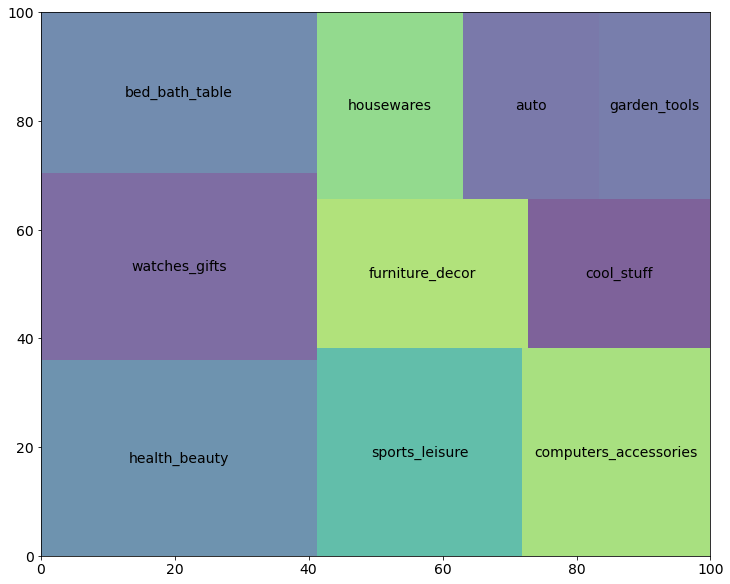

In [98]:
# treemap
# 매출액 기준 상위 10개만 확인
# import squarify

plt.figure(figsize=(12,10))
squarify.plot(sizes=temp['order_amount'][:10],
             label=temp.index.values[:10], alpha=.7)

In [ ]:
==>가장 높은 매출액을 보이는 상품 카테고리는 "health_beauty"이다.


In [127]:
#상품 카테고리별 주문 수와 매출액의 관계

#카테고리별 주문수 확인

df_cat_order_cnt = pd.DataFrame(df_order_item_prod_clean['product_category_name_english'].value_counts())
df_cat_order_cnt = df_cat_order_cnt.reset_index()
df_cat_order_cnt.columns = ['category', 'order_cnt']
df_cat_order_cnt

,category,order_cnt
0,bed_bath_table,10160
1,health_beauty,9022
2,sports_leisure,7858
3,computers_accessories,6887
4,furniture_decor,6781
...,...,...
66,home_comfort_2,24
67,la_cuisine,13
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,8


In [134]:
#카테고리별 매출액순 


df_cat_amount = pd.DataFrame(df_order_item_prod_clean.groupby(by=['product_category_name_english'])['order_amount'].sum())
df_cat_amount = df_cat_amount.sort_values(by='order_amount',ascending=False)
df_cat_amount = df_cat_amount.reset_index()
df_cat_amount.columns = ['category', 'order_amount'] //칼럼명 변경 
df_cat_amount

,category,order_amount
0,health_beauty,1258681.34
1,watches_gifts,1205005.68
2,bed_bath_table,1036988.68
3,sports_leisure,988048.97
4,computers_accessories,911954.32
...,...,...
66,flowers,1110.04
67,home_comfort_2,760.27
68,cds_dvds_musicals,730.00
69,fashion_childrens_clothes,569.85


In [120]:
#카테고리별 주문 비율 (두 테이블 비교를 위한 스케일 맞추기)

df_cat_order_cnt['order_cnt_perc'] = (df_cat_order_cnt['order_cnt'] / sum(df_cat_order_cnt['order_cnt']))*100
df_cat_order_cnt

,category,order_cnt,order_cnt_perc
0,bed_bath_table,10160,10.07
1,health_beauty,9022,8.94
2,sports_leisure,7858,7.78
3,computers_accessories,6887,6.82
4,furniture_decor,6781,6.72
...,...,...,...
66,home_comfort_2,24,0.02
67,la_cuisine,13,0.01
68,cds_dvds_musicals,12,0.01
69,fashion_childrens_clothes,8,0.01


In [155]:
#카테고리별 매출 비율
df_cat_amount['order_amount_perc'] = (df_cat_amount['order_amount'] / sum(df_cat_amount['order_amount']))*100
df_cat_amount


,category,order_amount,order_amount_perc
0,health_beauty,1258681.34,9.39
1,watches_gifts,1205005.68,8.99
2,bed_bath_table,1036988.68,7.74
3,sports_leisure,988048.97,7.37
4,computers_accessories,911954.32,6.80
...,...,...,...
66,flowers,1110.04,0.01
67,home_comfort_2,760.27,0.01
68,cds_dvds_musicals,730.00,0.01
69,fashion_childrens_clothes,569.85,0.00


In [135]:
#카테고리별 주문수와 매출액 테이블 결합

df_cat = pd.merge(df_cat_order_cnt, df_cat_amount,
        how='inner', on='category')
df_cat

,category,order_cnt,order_amount
0,bed_bath_table,10160,1036988.68
1,health_beauty,9022,1258681.34
2,sports_leisure,7858,988048.97
3,computers_accessories,6887,911954.32
4,furniture_decor,6781,729762.49
...,...,...,...
66,home_comfort_2,24,760.27
67,la_cuisine,13,2054.99
68,cds_dvds_musicals,12,730.00
69,fashion_childrens_clothes,8,569.85


In [136]:
# 매출액 기준으로 sorting

df_cat = df_cat.sort_values(by='order_amount',ascending=False)
df_cat = df_cat.reset_index(drop=True)
df_cat

,category,order_cnt,order_amount
0,health_beauty,9022,1258681.34
1,watches_gifts,5799,1205005.68
2,bed_bath_table,10160,1036988.68
3,sports_leisure,7858,988048.97
4,computers_accessories,6887,911954.32
...,...,...,...
66,flowers,29,1110.04
67,home_comfort_2,24,760.27
68,cds_dvds_musicals,12,730.00
69,fashion_childrens_clothes,8,569.85


In [161]:
#문제 생김 
#melt
#매출액 기준 상위 10개 카테고리만 출력
df_cat_melt = pd.melt(df_cat[:10], 
                      id_vars=['category'],
                      
                      value_vars=['order_cnt_perc','order_amount_perc'])
#                       value_vars=['order_cnt_perc'])

# df.reset_index(), id_vars='index', var_name="Name", value_name="Value"
df_cat_melt

KeyError: "The following 'value_vars' are not present in the DataFrame: ['order_amount_perc', 'order_cnt_perc']"

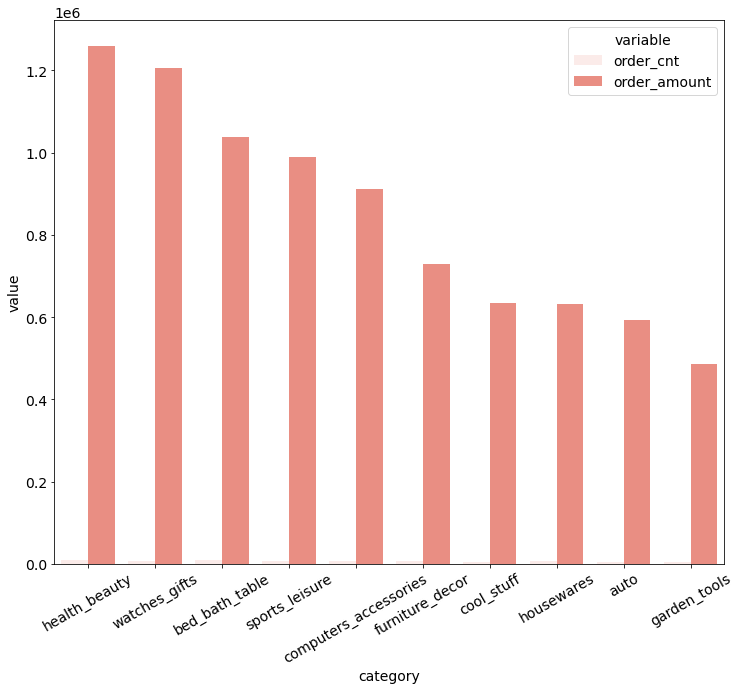

In [150]:
# barplot으로 시각화

plt.figure(figsize=(12,10))
ax = sns.barplot(data = df_cat_melt,
                 x="category",
                 y="value",
                 hue="variable",
                 color="salmon"
                )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()